## Task (in-lab assignment) - Analysing movies

For this task you will be working on the dataset 'netflix-titles.csv'.

you are required to do the following

- Load the dataset and set an appropriate column as your index.
- Answer the following questions and communicate your findings by visualising them using appropriate graphs.
    - Top 10 countries with highest number of movies  
    - on average which country produces the most successful movies (think which feature can indicate success)(no need for a graph) 
    - Add a feature indicating the year the title was added.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [11]:
data=pd.read_csv("E:/GUC/Sem 9/(NETW908) Data Engineering/6 - Datasets (Supplementary notes)/netflix-titles.csv")

In [12]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,4.2,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,1.4,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,10.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,5.8,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,4.5,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
data.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8794,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,7.3,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8795,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,3.4,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8796,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,10.0,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8797 non-null   object 
 1   type          8797 non-null   object 
 2   title         8797 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7972 non-null   object 
 5   country       7967 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8797 non-null   int64  
 8   rating        8797 non-null   float64
 9   duration      8794 non-null   object 
 10  listed_in     8797 non-null   object 
 11  description   8797 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 824.8+ KB


In [15]:
data.describe(include=object)

,show_id,type,title,director,cast,country,date_added,duration,listed_in,description
count,8797,8797,8797,6173,7972,7967,8797,8794,8797,8797
unique,8797,2,8797,4528,7682,748,1767,220,513,8765
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2812,109,1793,362,4


In [16]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

# Reindexing
Setting the Show id to be the new index of the dataframe

In [18]:
data.set_index('show_id', inplace=True)

In [19]:
data.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,4.2,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,1.4,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,10.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


# Top 10 Countries with the highest number of Movies

In [21]:
movies_df = data[data['type'] == 'Movie']
countries_df = movies_df['country'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)

In [22]:
countries_df

show_id
s1        United States
s8        United States
s8                Ghana
s8         Burkina Faso
s8       United Kingdom
              ...      
s8802            Jordan
s8803     United States
s8805     United States
s8806     United States
s8807             India
Length: 7379, dtype: object

In [23]:
country_counts = countries_df.value_counts()
top_10_countries = country_counts.head(10)
top_10_countries

United States     2752
India              962
United Kingdom     534
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: count, dtype: int64

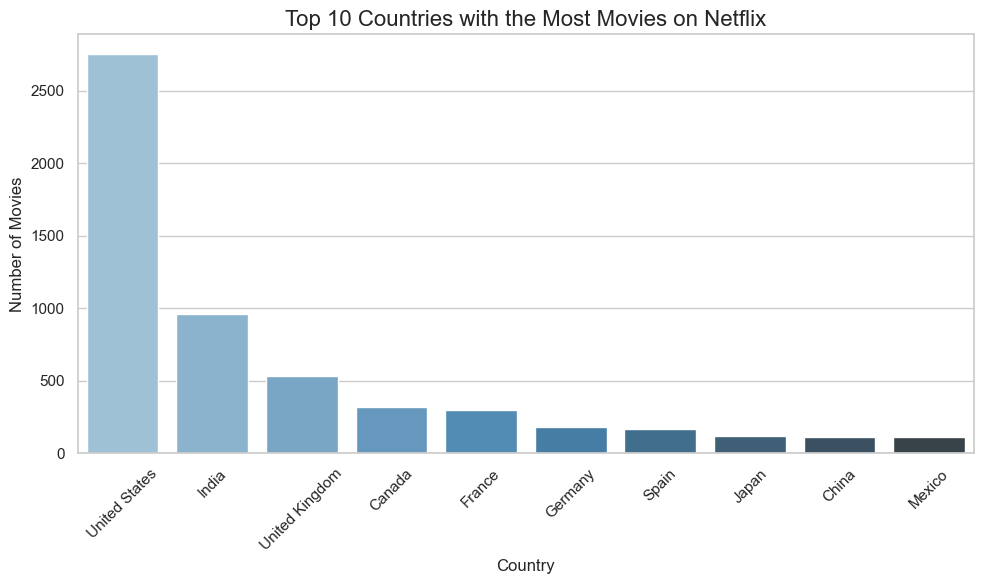

In [24]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, hue=top_10_countries.index, palette="Blues_d", dodge=False, legend=False)

plt.title('Top 10 Countries with the Most Movies on Netflix', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Top 10 Countries with the highest number of Successful Movies

## 1st solution (with threshold)
Assuming that a movie is successful if the rating of that movie is greater than or equal the threshold

In [27]:
Threshold=7
Successful_movies_df = data[(data['type'] == 'Movie') & (data['rating'] >= Threshold)]
Successful_movies_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,9.1,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,7.8,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,"September 21, 2021",1997,7.4,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...
s44,Movie,Jaws 3,Joe Alves,"Dennis Quaid, Bess Armstrong, Simon MacCorkind...",United States,"September 16, 2021",1983,8.5,98 min,"Action & Adventure, Horror Movies, Thrillers",After the staff of a marine theme park try to ...
s61,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",Japan,"September 15, 2021",2010,8.6,85 min,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ..."


In [28]:
countries_with_Successful_Movies_df = Successful_movies_df['country'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
countries_with_Successful_Movies_df

show_id
s10       United States
s13             Germany
s13      Czech Republic
s44       United States
s61               Japan
              ...      
s8795             Egypt
s8795            France
s8799             India
s8805     United States
s8807             India
Length: 2214, dtype: object

In [29]:
countries_with_Successful_Movies_counts = countries_with_Successful_Movies_df.value_counts()
top_10_countries_with_Successful_Movies = countries_with_Successful_Movies_counts.head(10)
top_10_countries_with_Successful_Movies

United States     826
India             285
United Kingdom    151
Canada             91
France             90
Germany            60
Spain              48
Mexico             40
Egypt              35
China              35
Name: count, dtype: int64

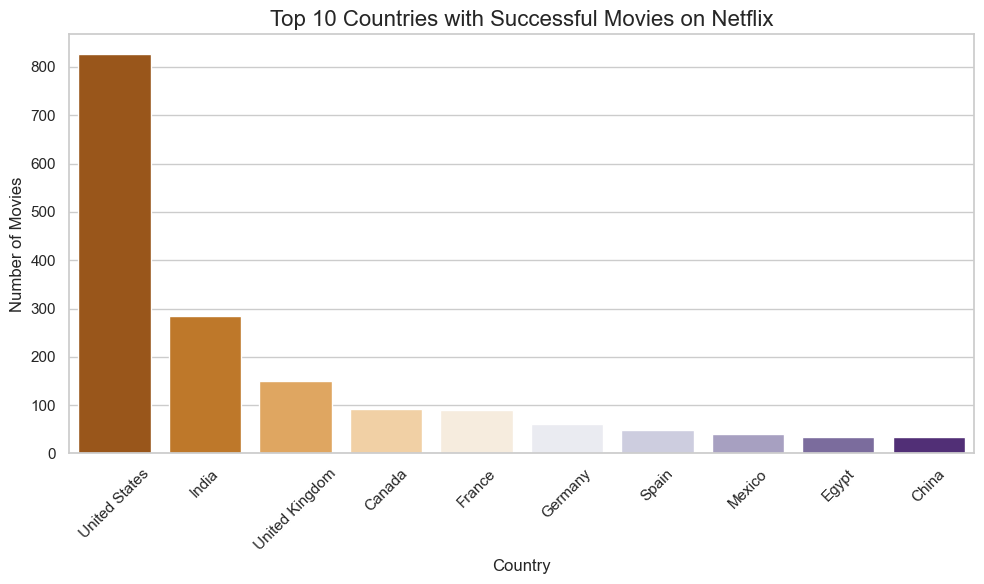

In [33]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_countries_with_Successful_Movies.index, y=top_10_countries_with_Successful_Movies.values, hue=top_10_countries_with_Successful_Movies.index, palette="PuOr", dodge=False, legend=False)

plt.title('Top 10 Countries with Successful Movies on Netflix', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The country with the most successful movies is **United States**

## 2nd solution (with average rating and number of movies)
score = (sum of ratings/no.movies) * no.movies = sum of ratings
where the country rating will be from 0 to 5

In [134]:
movies_df = data[(data['type'] == 'Movie')]
movies_df=movies_df.assign(country=movies_df['country'].str.split(',')).explode('country')
countries_with_Successful_Movies_df = movies_df.groupby(['country'])['rating'].sum().rename("Total_rating")
countries_with_Successful_Movies_df = pd.DataFrame(countries_with_Successful_Movies_df.sort_values(ascending=False))

min_value = countries_with_Successful_Movies_df['Total_rating'].min()
max_value = countries_with_Successful_Movies_df['Total_rating'].max()

Country_Score = 5 * (countries_with_Successful_Movies_df['Total_rating'] - min_value) / (max_value - min_value)
countries_with_Successful_Movies_df['Country_Score']=Country_Score
countries_with_Successful_Movies_df
top_10_countries_with_Successful_Movies=countries_with_Successful_Movies_df.head(10)
top_10_countries_with_Successful_Movies

,Total_rating,Country_Score
country,,
United States,11830.5,5.000000
India,4559.1,1.926790
United States,1920.1,0.811433
United Kingdom,1892.9,0.799937
Canada,845.3,0.357176
France,746.2,0.315292
United Kingdom,719.5,0.304008
France,716.6,0.302782
Canada,643.1,0.271718


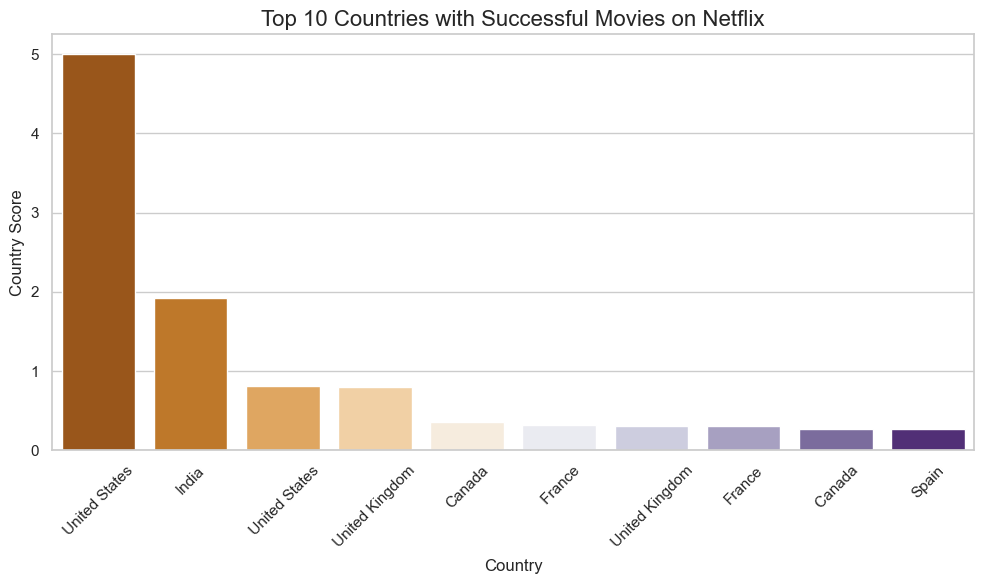

In [151]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_countries_with_Successful_Movies.index, y=top_10_countries_with_Successful_Movies['Country_Score'].values, hue=top_10_countries_with_Successful_Movies.index, palette="PuOr", dodge=False, legend=False)

plt.title('Top 10 Countries with Successful Movies on Netflix', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Country Score', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The country with the most successful movies is **United States**

# Extracting the year from the date_added column

In [213]:
data['date_added(datetime)'] = pd.to_datetime(data['date_added'].str.strip())
data['year_added'] = data['date_added(datetime)'].dt.year
data.insert(6, 'year_added', data.pop('year_added'))
data.head()

,type,title,director,cast,country,date_added,year_added,release_year,rating,duration,listed_in,description,date_added(datetime)
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2021,2020,4.2,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2021,1.4,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,2021,10.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,2021,5.8,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2021,4.5,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
